In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl


In [2]:
def simular_demanda(D0, sigma, H, iters = 1000):
    '''
    D0: Demanda de hoy
    H: Horizonte de t
    sigma: desv. estándar
    iters: instancias simuladas
    '''
    demandas = {i: [] for i in range(1,H+1)}
    rutas = {}
    for it in range(iters):
        if it <= 5:
            rutas[it] = [D0]
        D_prev = D0
        dem_it = [D0]
        for t in demandas.keys(): 
            Dt = round(np.random.default_rng().normal(D_prev, sigma, 1)[0])
            # if Dt <= 0:
            #     Dt = 0
            if it <= 5:
                rutas[it].append(Dt)
            D_prev = Dt
            demandas[t].append(Dt)
            # dem_it.append(Dt)
    return demandas, rutas

In [3]:
def simular_demanda_std_decrece(D0, sigma, H, iters = 1000):
    '''
    D0: Demanda de hoy
    H: Horizonte de t
    sigma: desv. estándar
    iters: instancias simuladas
    '''
    demandas = {i: [] for i in range(1,H+1)}
    rutas = {}
    for it in range(iters):
        if it <= 5:
            rutas[it] = [D0]
        D_prev = D0
        sigma_prev = sigma
        dem_it = [D0]
        for t in demandas.keys(): 
            Dt = round(np.random.default_rng().normal(D_prev, sigma_prev, 1)[0])
            # if Dt <= 0:
            #     Dt = 0
            if it <= 5:
                rutas[it].append(Dt)
            D_prev = Dt
            demandas[t].append(Dt)
            # dem_it.append(Dt)
    return demandas, rutas

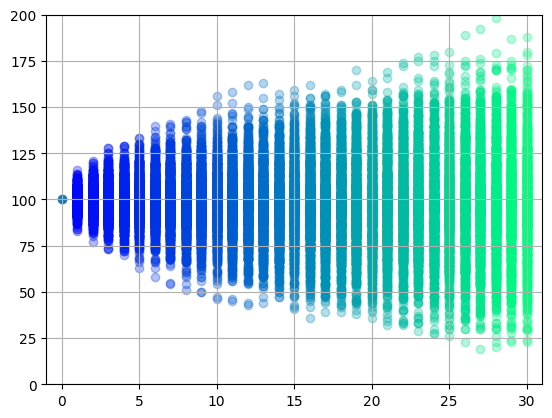

In [4]:
D0 = 100
sigma = D0*0.05
H = 30
iters = 1000

data = simular_demanda(D0,sigma,H,iters)

x = list(data[0].keys())
y = list(data[0].values())
rutas = data[1]

colors = pyl.cm.winter(np.linspace(0,1,len(x)+1))

for xe, ye in zip(x, y):
    plt.scatter([xe] * len(ye), ye, alpha = 0.3, color = colors[xe])
plt.scatter(0,D0)
plt.axis([-1, H+1, 0, 2*D0])
plt.grid(10)
plt.savefig('t.png')

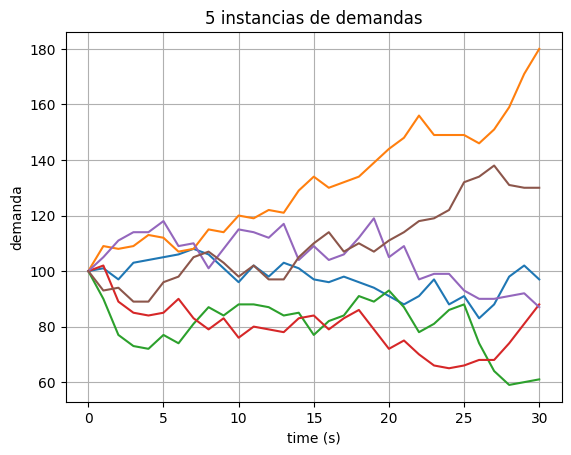

In [5]:
fig, ax = plt.subplots()

for t in rutas.keys():
    ax.plot([0] + x, rutas[t])
ax.set(xlabel='time (s)', ylabel='demanda',
       title='5 instancias de demandas')
ax.grid()

plt.show()

C:\Users\pato2\AppData\Local\Temp\ipykernel_30768\1376375560.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 256)


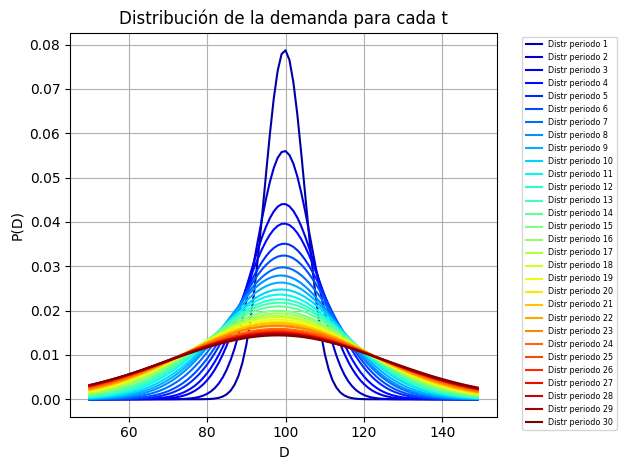

In [6]:
from scipy.stats import norm
import matplotlib.pylab as pl
distr_D = {}
i = 0

fig, ax = plt.subplots()

ax.set(xlabel='D', ylabel='P(D)',
       title='Distribución de la demanda para cada t')
ax.grid()

x_distr = np.arange(50, 150, 1)
viridis = plt.cm.get_cmap('viridis', 256)
colors = pl.cm.jet(np.linspace(0,1,len(y)+1))
for datos_t in y:
    i +=1 
    mu_t = np.mean(datos_t)
    sigma_t = np.std(datos_t)
    distr_D[i] = mu_t,sigma_t
    ax.plot(x_distr, norm.pdf(x_distr, mu_t, sigma_t), label=f'Distr periodo {i}', color=colors[i])


plt.legend(bbox_to_anchor=(1.05, 1.0), loc='best', fontsize = 'xx-small')
plt.tight_layout()
plt.show()

# podría haber usado multiline + cmap
# distr_D

C:\Users\pato2\AppData\Local\Temp\ipykernel_30768\3226385029.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, c = np.linalg.lstsq(A, sigma_y)[0]


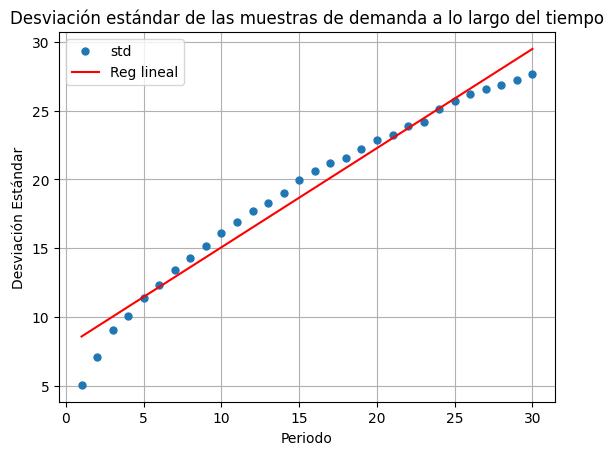

In [7]:
sigma_list = [distr_D[x][1] for x in distr_D.keys()]
sigma_x = np.array(x)
sigma_y = np.array(sigma_list)
A = np.vstack([sigma_x, np.ones(len(sigma_x))]).T
m, c = np.linalg.lstsq(A, sigma_y)[0]
m, c

fig, ax = plt.subplots()

ax.set(xlabel='Periodo', ylabel='Desviación Estándar',
       title='Desviación estándar de las muestras de demanda a lo largo del tiempo')
ax.grid()

_ = ax.plot(sigma_x, sigma_y, 'o', label='std', markersize=5)
_ = ax.plot(sigma_x, m*sigma_x + c, 'r', label=f'Reg lineal')
_ = ax.legend()
plt.show()

IndexError: tuple index out of range

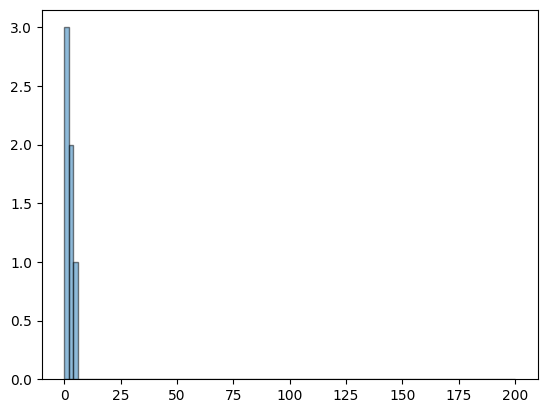

In [8]:
bins = np.linspace(0, 200, 100)
for t in x[:5]:
    y = data[t]
    plt.hist(y, bins, alpha=0.5, label=f't = {t}', edgecolor = "black")
plt.legend(loc='upper right')
# plt.axis([, 0, 10])
plt.show()

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Primeros 5 periodos vs Últimos 5 periodos')
axs[0].plot(x, y)
axs[1].plot(x, -y)